# **1. Load the data**

In [227]:
#importing dependencies
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno
warnings.filterwarnings('ignore')
%matplotlib inline

In [228]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH =  os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL , housing_path = HOUSING_PATH):
  os.makedirs(housing_path, exist_ok = True)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path = housing_path)
  housing_tgz.close()

In [229]:
#Reading the traing and test data
fetch_housing_data()
housing_file_path='/content/datasets/housing/housing.csv'
housing_data = pd.read_csv(housing_file_path)

In [230]:
print("First 5 values of Housing Dataset:")
housing_data.head()

First 5 values of Housing Dataset:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# **2. Exploratory Data Analysis (EDA)**

**Exploring the training dataframe**

In [231]:
# columns in housing data
list(housing_data.columns)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [232]:
# no. of rows and columns in housing data
housing_data.shape

(20640, 10)

In [233]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


We can see that we have a total of 10 columns, let us iterate over each column and analyse them to understand the dataset better!



1.   longitude (float64) : A measure of how far west a house is; a more negative value is farther west
2.   latitude (float64) : A measure of how far north a house is; a higher value is farther north
3.   housing_median_age (float64) : Median age of a house within a block; a lower number is a newer building
4.   total_rooms (float64) : Total number of rooms within a block
5.   total_bedrooms (float64) : Total number of bedrooms within a block
6.   population (float64) : Total number of people residing within a block
7.   households (float64) : Total number of households, a group of people residing within a home unit, for a block
8.   median_income (float64) : Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9.   median_house_value (float64) : Median house value for households within a block (measured in US Dollars)
10.  ocean_proximity (String) : The current direction and the intensity of the flow are influenced by deep contours, encounters with other waves, and coastline arrangements

Categorical: ocean_proximity

Numerical: longitude(Continuous), latitude(Continuous), housing_median_age(Continuous), total_rooms(Continuous), total_bedrooms(Continuous), population(Discrete), households(Continuous), median_income(Discrete), median_house_value(Discrete)

**Identifying any missing data**

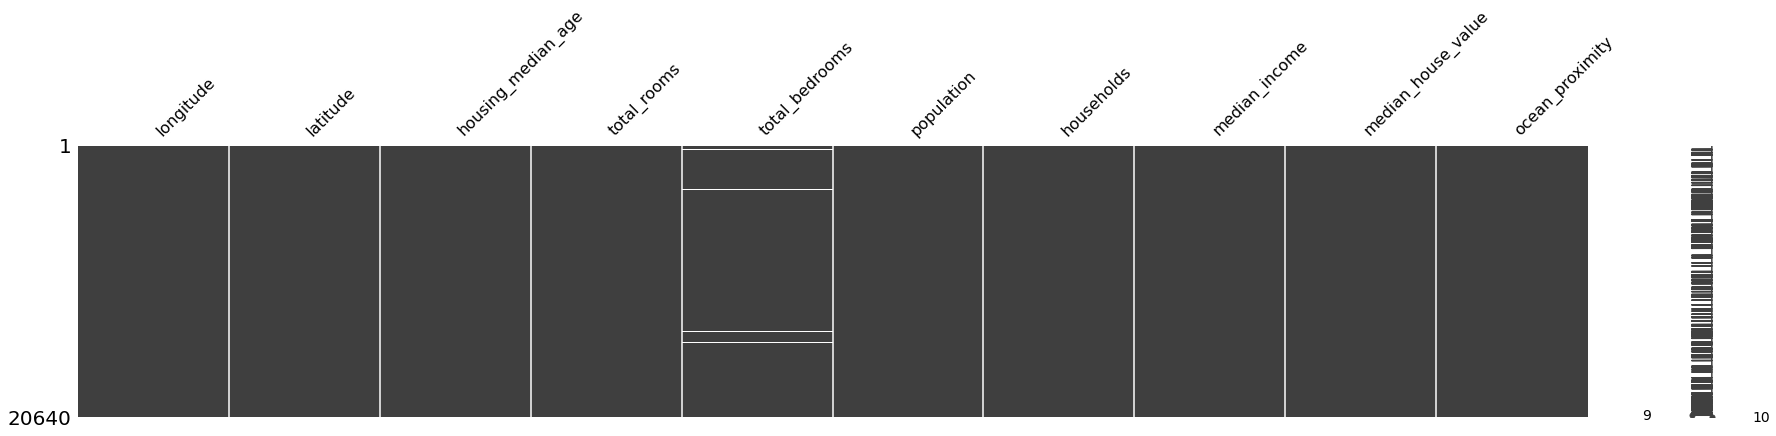

In [234]:
#Plot graphic of missing housing data
import missingno
missingno.matrix(housing_data, figsize = (30,5))

In [235]:
# Finding number of missing values 
housing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [236]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    return ms

**Writing a helper function to see the missing the missing data in the train and test data**

In [237]:
print("Housing data")
missingdata(housing_data)

Housing data


,Total,Percent
total_bedrooms,207,1.002907


# **3. Data Pre-processing**

# **Imputation**

**Both the train and validation total_bedrooms features contains some missing Data so we are fill with the median**

In [238]:
housing_data['total_bedrooms'].fillna(housing_data['total_bedrooms'].median(), inplace = True)

In [239]:
print('check the nan value in housing data')
print(housing_data.isnull().sum())

check the nan value in housing data
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


### **Ordinal Encoding**

In [240]:
# Apply ordinal encoder to each column with categorical data
from sklearn.preprocessing import OrdinalEncoder

# Categorical columns in the training data
object_cols = [col for col in housing_data.columns if housing_data[col].dtype == "object"]

print(object_cols)

# Apply ordinal encoder 
ordinal_encoder = OrdinalEncoder()
housing_data[object_cols] = ordinal_encoder.fit_transform(housing_data[object_cols])
housing_data.head()

['ocean_proximity']


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0


# **4. Feature Engineering**

In [241]:
# no of rooms per household
housing_data['room-per_household'] = housing_data.total_rooms / housing_data.households

# no of bedrooms per household
housing_data['bedroom_per_household'] = housing_data.total_bedrooms / housing_data.households

housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,room-per_household,bedroom_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3.0,6.984127,1.023810
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3.0,6.238137,0.971880
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3.0,8.288136,1.073446
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3.0,5.817352,1.073059
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0,6.281853,1.081081


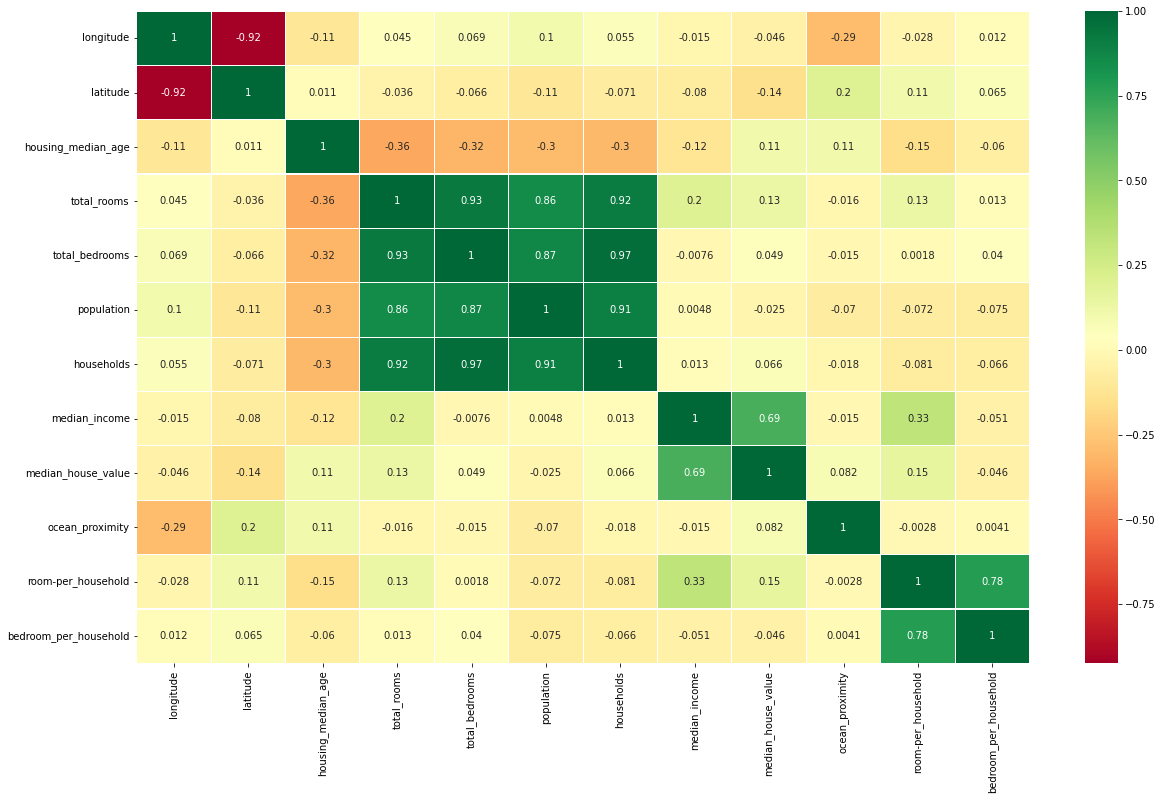

In [242]:
sns.heatmap(housing_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [243]:
#split data to train and test
from sklearn.model_selection import train_test_split

housing_features = ['longitude',	'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'room-per_household', 'bedroom_per_household', 'ocean_proximity']

# assigning the required features in X
X = housing_data[housing_features]
# assigning the result column in y
y = housing_data.median_house_value
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1, train_size = 0.8, test_size = 0.2)

In [244]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,room-per_household,bedroom_per_household,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,1.023810,3.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,0.971880,3.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,1.073446,3.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,1.073059,3.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,1.081081,3.0


# **5. Model**

In [245]:
from xgboost import XGBRegressor
XGB_model = XGBRegressor(n_estimators=5000,random_state=1)
XGB_model.fit(train_X, train_y)

val_prediction = XGB_model.predict(val_X)

print('The accuracy of the XGBRegressor is',round(XGB_model.score(val_X, val_y)*100,2))

[16:26:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The accuracy of the XGBRegressor is 83.94


In [246]:
# from sklearn.ensemble import RandomForestRegressor

# forest_model = RandomForestRegressor(n_estimators=500,random_state=1)
# forest_model.fit(train_X, train_y)
# val_prediction = forest_model.predict(val_X)

# print('The accuracy of the Random Forest Regression is',round(forest_model.score(val_X, val_y)*100,2))

# **6. Prediction**

In [247]:
val_prediction = XGB_model.predict(val_X)
print(prediction_df)

      median_house_value
0          388586.625000
1           56938.808594
2          229487.468750
3          118988.265625
4          246300.015625
...                  ...
4123        54765.894531
4124       418449.968750
4125       361378.593750
4126       255184.734375
4127        99119.867188

[4128 rows x 1 columns]


In [248]:
print('The accuracy of the XGBRegressor is',round(XGB_model.score(val_X, val_y)*100,2))

The accuracy of the XGBRegressor is 83.94


In [249]:
from sklearn.metrics import mean_squared_error
from math import sqrt

prediction_df = pd.DataFrame({'median_house_value': val_prediction})
rms = sqrt(mean_squared_error(val_y, prediction_df))

print('The rmsc of the XGBRegressor is', round(rms, 2))

The rmsc of the XGBRegressor is 45898.79
